# KFold 예제

#### sklearn.model_selection.KFold
* class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold

In [146]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.datasets import load_iris

In [147]:
iris = load_iris()
# from sklearn.datasets import load_iris 안하면 오류가 남
# name 'load_Iris' is not defined
# not defined 오류가 났으면 내가 변수 선언을 했는지 확인을 해봐야함

In [148]:
features = iris.data # 피쳐만 뽑아냄
label = iris.target # 라벨만 뽑아냄
dt_clf = DecisionTreeClassifier(random_state=156)

In [151]:
#iris.target # y, label, 꽃 종류 3개
#iris.data # x, feature
iris.feature_names # data 에 들어가는 feature_name (length랑 width들...)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=11)
# train set하고 나서 kfold 하는 게 정석

kfold = KFold() # default가 KFold()니까 예제처럼 n_splits 해줄 필요 없음
# n_splits = 5는 5중첩

# 5개로 나눈 다음 features를 넣었음
for i in kfold.split(X_train): #features가 아니라 X_train
    print(i)
    # array 하나가 i 하나
    # kfold 5번했기 때문에 5개 나옴
    # () 튜플 형태로 묶여 있고 ,로 2개가 묶여 있음

(array([ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]))
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86

In [10]:
for i, j in kfold.split(X_train): # 예제에서는 여기 features라고 했는데 train셋을 나누지 않았기 때문임
    print(f'train set : {i}')
    print(f'validation set : {j}')
    print('\n')

# 그래서 이렇게 i, j로 적어주면 이렇게 됨
# 여기서 나오는 번호는 인덱스 값을 준 것
# 첫 번째 train set : [] 을 보면 24번째, 25번째, 26번째,,, 데이터로 train 했다는 의미
# 하지만 얘를 쓰려면 indexing으로는 안되니까 인덱스를 호출해서 만들어내야 함
# kfold는 인덱스 번호를 주고 있는 것을 알 수 있음 (데이터가 아니라)

# i 96개, j 24개

# 첫 번째 train set : []이 24번째니까
# for문을 돌려서 하나의 train set을 만들면 됨

train set : [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
validation set : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


train set : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
validation set : [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]


train se

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=11) 
# 데이터 셋을 분리시킨 것, 훈련셋, 학습셋 이거 분리시킨 것을 random_state로 한 것
# 그 때 그 때마다 예측 값이 달라짐
# 같은 알고리즘에서 분석방법을 돌려보려면 random_state=11로 해야함ㅇㅇ

kfold = KFold()
cv_accuracy = []

for i, j in kfold.split(X_train): # 인덱스 번호만 불러올 거라 여기는 X_train이 들어오든 Y_train이 들어오든 상관이 없다.
    # print(f'train set : {i}')
    # print(f'validation set : {j}')
    # print('\n')
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    train_X, test_X = X_train[i], X_train[j] # 맨 위에 X_train으로 했기 때문에 여기 X_train으로 두 개 적은 것
                                            # train_X에는 96개의 실제 값이 들어옴
                                            # test_X에는 24개의 실제 값이 들어옴
    train_Y, test_Y = y_train[i], y_train[j] # 위의 인덱스 값에 맞춰서 label 값도 필요하기 때문에 이거 불러옴
                                            # 인덱스 번호를 불러와야 feature 값도 가져오고 label 값도 세트를 맞춰서 가져올 수 있기 때문
                                            # 그래서 kfold에서는 인덱스 번호를 준다.
                                            # 번호를 맞춰서 딱 매칭이 되어 있는 상태

    # 학습 및 예측
    dt_clf.fit(train_X, train_Y) # fit에 넣는 건 훈련 데이터 (=학습)
    pred = dt_clf.predict(test_X) 
    # 예측한 데이터가 맞는지 확인하는 test 값
    # test data가 남겨둔 것, 지금까지 훈련하고 예측한 결과와 test data와 비교하는 것
    
    # 반복시마다 정확도 측정
    accuracy = np.round(accuracy_score(test_Y, pred), 4) # 
    cv_accuracy.append(accuracy)
    #print(accuracy)
print(cv_accuracy)
np.mean(cv_accuracy) # list 값의 평균 구하기
                    # 0.94166 나왔으니 좋네! 이대로 시키면 되겠네


[0.875, 0.9583, 1.0, 0.9167, 0.9583]


0.94166

In [24]:
from sklearn.model_selection import train_test_split

kfold = KFold()
cv_accuracy = []

for train_index, test_index in kfold.split(features): # 얘는 features 값을 for문 돌려서 index 값을 i와 j로 넣어준 것
#     print(f"train set :{i}")
#     print(f"validation set :{j}")
#     print('\n')

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test ,pred), 4)
    cv_accuracy.append(accuracy)
#     print(accuracy)

print(cv_accuracy)
np.mean(cv_accuracy)

# 왜 위에 결과가 더 좋을까? kfold라 그렇다~

[1.0, 0.9667, 0.8667, 0.9333, 0.7333]


0.9

In [152]:
from sklearn.model_selection import train_test_split

kfold = KFold(n_splits=3)
cv_accuracy = []
n_iter = 0 # 반복횟수, 한 번 실행할 때마다 +1되게 만들어진 것

for train_index, test_index in kfold.split(features):
#     print(f"train set :{i}")
#     print(f"validation set :{j}")
#     print('\n')
    n_iter += 1

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    #print(len(X_train))
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print(pred)
    # print(f'\n {n_iter}번째 accuracy(정확도) : {accuracy}, 학습데이터 크기 : {X_train.shape[0]}, 검증데이터 크기 : {X_test.shape[0]}')
    # print(f'\n {n_iter}번째 검증데이터 인덱스 {test_index}')
    
    cv_accuracy.append(accuracy)
#     print(accuracy)

print(cv_accuracy)
np.mean(cv_accuracy)

# 왜 위에 결과가 더 좋을까? kfold라 그렇다~


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.0, 0.0, 0.0]


0.0

150개 50개씩 -> 8:2 -> 150개.. 50개.. 학습 몇 개임 ;
test 가 50 학습이 100 150갠데 3개로 나눠서
50개 먼저 test로 설정하고 100개를 훈련으로 설정
test를 먼저 뺌

test 50개 -> 0  / 훈련 -> 100개 1, 2 => 훈련은 1, 2만 했는데 0넣어줘 근데 난 0이 뭔지 모름
test 50개 -> 1 / 훈련 -> 100개 0, 2 
test 50개 -> 2 / 훈련 0, 1

### sklearn.model_selection.StratifiedKFold
* class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratified#sklearn.model_selection.StratifiedKFold

* split method : split(X, y, groups=None) # split이 y도 갖고 있다~

In [1]:
from sklearn.model_selection import StratifiedKFold 
# 해당 라이브러리를 사용하니까 숫자를, 인덱스를 골고루 가져온다
# 위의 kfold는 label 값을 앞에서부터 순서대로 가져오기 때문에
# 데이터가 불균형적일 때 가져올 수 있는 것

skf = StratifiedKFold(n_splits=3)
cv_accuracy = []
n_iter = 0

for X_train, test_index in skf.split(features, label): # 위의 split method의 차이는 ? 여기는 y도 와야함 (label)
    #print(i) #for i in skf.split(features, label) 로 해서 확인해보면
             # 하나의 튜플에 두 개의 array로 나옴 그래서 for i 가 아니라 for i, j로 해야함
            # 여기서의 i를 X_train, j를 test_index로 표시해 줄것 
    #print(f'확인해보려고 쓰는 글씨{features[test_index]}')
            # 이거로 해보면 위에 n_splits=3 이라서 3번의 확인해보려고 쓰는 글시가 나옴
    n_iter +=1
    X_train , X_test = features[train_index] , features[test_index]
    y_train , y_test = label[train_index] , label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    print(f'\n{n_iter}번째 정확도 {accuracy}  , 학습데이터 크기 {X_train.shape[0]}, 검증데이터 크기 {X_test.shape[0]}')
    print(f'\n {n_iter}번째 검증데이터 인덱스 {test_index} ')
    cv_accuracy.append(accuracy)
    
#     print(accuracy)
# print(cv_accuracy)
np.mean(cv_accuracy)
    

    #label_train = label.iloc[train_index]
    #label_test = label.iloc[train_index]

NameError: name 'features' is not defined

In [48]:
# 검증은 학습과정에서 나올 수 있는 용어
# 평가 단계에서는 test set
# 용어는 x_train, x_test 썼지만...
# 여기서 검증은? 교차방법 사용한 것
# 교차검증은 kfold 와 stratifiedkfold 두 가지를 많이 이용함, 그 중 stratifiedkfold를 이용하는데.. sklearn에 더 빠르고 좋은 방법을 제공함

# -> cross_val_score()

### sklearn.model_selection.cross_val_score
* sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val#sklearn.model_selection.cross_val_score

몇 줄짜리를 간편하게 줄였기 때문에 파라미터가 많을 수 밖에 없음

* sklearn.model_selection.cross_val_score \
(estimator, #알고리즘 \
X, # feature 값 \
y=None, # label 값 \
*, \
groups=None, \
scoring=None, \
cv=None, # cross_value, 몇 번 접을건지 \
n_jobs=None, # 병렬연산 \
verbose=0, # 수다쟁이, 분리과정을 설명하는 것, 1로 두면 자세히 설명해줌 \
fit_params=None, \
pre_dispatch='2*n_jobs', \
error_score=nan)[source] 
> X, y, scoring, cv 만 잘 보면 됨

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris() # iris 데이터 가져올게
dt_clf = DecisionTreeClassifier(random_state=156) # 알고리즘 트리쓸게

features = iris_data.data # feature값
label = iris_data.target # label값

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, features, label, scoring='accuracy', cv=3) # 나누기 애매하다고 3이나 5 쓰라고 하심
#정확도로 나타내 줄게 cv=3은 3번 접어줘
# accuracy 값으로 뱉어줌
# 3 fold 해주는데, 
# test set으로의 predict, 예측할 때의 predict이 안들어감
print('교차 검증별 정확도 : ', np.round(scores, 4)) # 평균 값으로 안나오고 list로 나옴
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.92 1.  ]
평균 검증 정확도 :  0.9667


# GridSearchCV

### sklearn.model_selection.GridSearchCV
* class sklearn.model_selection.GridSearchCV \
(estimator, \
param_grid, # 변수 = 파라미터 \
*, \
scoring=None, \
n_jobs=None, \
refit=True, # best 파라미터를 찾아서 다시 학습시켜줘 \
cv=None, \
verbose=0, \
pre_dispatch='2*n_jobs', \
error_score=nan, \
return_train_score=False)
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

In [59]:
# 격자를 만들고 각각의 값을 넣어두고 최적의 값을 찾아라
#grid search CV가 2일 때 뭐, 5일 때 뭐… 이렇게 하나하나 따져가면서 최적의 accuracy 값을 가져가면서 선택하는 것
#grid search CV는 accuracy가 좋게 나왔을 때도 알려줌
#gird search를 하는데 cross_validation 이용해서 search해줘라
#똑같은 알고리즘인데 그 안에 들어가는 하이퍼 파라미터가 1, 2, 3, 4,,, 이렇게 다른 걸 넣어보고 좋은걸 알려줌
#→ 2번째 5 fold, 3번째 fold… 이렇게 해서 ㅇㅇ
#⇒ grid search CV는 cross_validation을 이용해서 최적의 parameter를 찾기 위해 사용하는 알고리즘


# gridsearch는 교차검증하는 것, kfold가 교차검증에 많이 사용하니까 kfold를 이용해서 교차검증 하는 거서
# 격차 탐색은 무조건 cross_validation

In [153]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이터와 테스트데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier() # rando_state안해줬네 해주는게 좋음

# parameter들을 dict형태로 설정
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}


import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설정
# refit=True가 default임. True면 가장 좋은 파라미터 설정으로 재학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [64]:
grid_dtree.cv_results_
# Attributes:: cv_results_ : dict of numpy (masked) ndarrays

{'mean_fit_time': array([0.001218  , 0.00087563, 0.00058905, 0.0008533 , 0.00066479,
        0.00094485]),
 'std_fit_time': array([0.00031177, 0.00021494, 0.00043181, 0.00063816, 0.00047008,
        0.00075088]),
 'mean_score_time': array([0.00033156, 0.00017007, 0.00034674, 0.00033251, 0.00066447,
        0.00047954]),
 'std_score_time': array([0.0004689 , 0.00024052, 0.00049036, 0.00047025, 0.00046985,
        0.00041646]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_sample

In [67]:
grid_dtree.best_estimator_
# 누락된 점수 중 가장 좋은 것?

DecisionTreeClassifier(max_depth=3)

In [65]:
grid_dtree.best_score_

0.975

In [66]:
grid_dtree.best_params_
# 'max_depth'가 3이고  'min_samples_split'가 2일 때가 best

{'max_depth': 3, 'min_samples_split': 2}

In [68]:
grid_dtree.feature_names_in_
# 이건 사이킷런 홈페이지에 있던 건데 왜 안되는지? 모르겠네?
# 근데 교수님거에도 안났음

AttributeError: 'GridSearchCV' object has no attribute 'feature_names_in_'

In [69]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이터와 테스트데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier() # rando_state안해줬네 해주는게 좋음

# parameter들을 dict형태로 설정
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}


import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설정
# refit=True가 default임. True면 가장 좋은 파라미터 설정으로 재학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]
# 해당 코드를 살리면 DataFrame형식으로 반환해줘서 보여줌

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [70]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9667


### sklearn.datasets.make_classification
* sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

In [91]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=300, n_features=2, n_classes=3)
# data 300개, feature 2개, class 3개

plt.plot(X, y)
plt.show()

# 교수님이 만들어보라고 해서 해봤지만 오류가 남
# 밑에 교수님이 하신거 있음

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

[1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 1 0 1 2 2 0 2 1 0 2 0 2 0 0 1 1 0 0 0 1 1 0
 0 0 1 1 2 1 0 2 1 0 0 1 2 0 1 2 0 1 2 1 1 2 2 2 0 1 2 1 2 0 1 1 1 2 1 1 0
 0 0 2 2 0 1 0 2 1 0 0 2 1 2 2 1 2 1 0 2 0 2 0 0 2 0 1 2 1 0 2 0 0 0 2 1 2
 1 2 1 0 2 2 2 1 2 2 0 1 1 0 0 2 1 0 1 0 1 1 0 1 2 0 2 0 2 1 1 1 2 1 1 2 1
 2 0 0 2 1 1 1 2 1 1 2 2 0 1 0 2 0 2 1 2 0 1 0 1 1 0 2 1 0 1 2 0 2 1 0 0 0
 2 0 1 0 1 2 2 2 1 2 0 0 0 2 2 0 1 1 1 1 0 2 1 2 2 2 0 1 0 2 0 0 0 1 0 1 2
 0 0 2 0 2 2 2 0 0 1 1 0 2 2 0 2 1 0 2 1 0 2 2 0 0 1 1 0 1 1 2 0 0 2 1 2 0
 0 2 1 2 1 1 0 1 1 2 0 0 0 1 2 2 1 0 2 1 0 1 0 2 0 0 0 1 2 0 0 2 0 2 2 2 2
 2 1 2 0]


c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  func(*args, **kwargs)
c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
c:\U

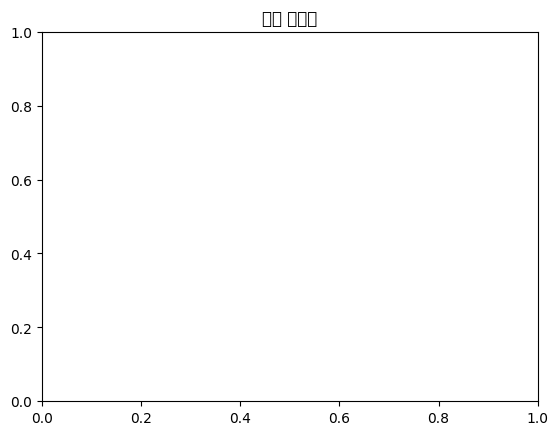

In [100]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("다중 클래스")
#flip_y 매개변수를 이용한 노이즈 추가
X, y = make_classification(n_samples = 300,
                            n_features=2, 
                           n_informative=2,
                           n_redundant=0, 
                           n_clusters_per_class=1, # 클래스당 클러스터(군집)를 하나만 두겠다.
                           random_state=42,
                           n_classes=3
                          )
#print(len(X)) # 샘플 x의 개수를 보기 위해 len 봤음
#print(X) # feature가 2개 짜리 
#print(y) # 0, 1, 2로 이루어짐

# plt.scatter(X[:, 0], X[:, 1], marker='v', c=y,
#             s=200, edgecolor="k",)

# plt.xlabel("$X_1$")
# plt.ylabel("$X_2$")
# plt.show()
# print('X형태 =' ,X.shape)
# print('y형태 =' ,y.shape)

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris

X, y = make_classification(n_samples = 300,
                            n_features=2, 
                           n_informative=2,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=42,
                           n_classes=3
                          )

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier() 

parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}


import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

    # 3, 2와 3, 3이 가장 좋음

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.625000,5,0.6125,0.625,0.6375
1,"{'max_depth': 1, 'min_samples_split': 3}",0.625000,5,0.6125,0.625,0.6375
2,"{'max_depth': 2, 'min_samples_split': 2}",0.891667,3,0.8875,0.875,0.9125
3,"{'max_depth': 2, 'min_samples_split': 3}",0.891667,3,0.8875,0.875,0.9125
4,"{'max_depth': 3, 'min_samples_split': 2}",0.912500,1,0.9000,0.875,0.9625
5,"{'max_depth': 3, 'min_samples_split': 3}",0.912500,1,0.9000,0.875,0.9625


In [104]:
grid_dtree.predict(X_test)

array([2, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2])

In [105]:
from sklearn.metrics import accuracy_score

pred = grid_dtree.predict(X_test)

accuracy_score(y_test, pred) # test에 대한 예측 값 0.95가 나옴

0.95

### sklearn.datasets.load_diabetes
* sklearn.datasets.load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html?highlight=load_di#sklearn.datasets.load_diabetes

In [111]:
from sklearn.datasets import load_diabetes

diabet = load_diabetes()
diabet.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [112]:
diabet.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level
- s1 tc, T-Cells (백혈구의 일종)
- s2 ldl, 저밀도 리포단백질
- s3 hdl, 고밀도 지질단백질
- 갑상선 자극 호르몬
- s5 ltg, lamotrigine
- s6 글루, 혈당치

In [113]:
features = diabet.data
features

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [115]:
label = diabet.target
label

import pandas as pd
diabets_df = pd.DataFrame(features, columns=diabet.feature_names)
diabets_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [116]:
diabets_df['label'] = label #diabet.target
diabets_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


앗 뭐야 diabets는 classification이 아니잖아? \
-> Pima Indians Diabetes Database 해보자 \
파일 kaggle에서 다운받고 csv 파일 datasets에 넣어둠
> https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [118]:
import pandas as pd

diabets_df = pd.read_csv('./datasets/diabetes.csv')
diabets_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
diabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
diabets_df.describe()
# Pregnancies 임신 최대 17..

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [126]:
features = diabets_df.drop('Outcome', axis=1)
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [122]:
label = diabets_df['Outcome']
label

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier() 

parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}


import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.711701,3,0.731707,0.707317,0.696078
1,"{'max_depth': 1, 'min_samples_split': 3}",0.711701,3,0.731707,0.707317,0.696078
2,"{'max_depth': 2, 'min_samples_split': 2}",0.723139,1,0.731707,0.707317,0.730392
3,"{'max_depth': 2, 'min_samples_split': 3}",0.723139,1,0.731707,0.707317,0.730392
4,"{'max_depth': 3, 'min_samples_split': 2}",0.695441,5,0.707317,0.682927,0.696078
5,"{'max_depth': 3, 'min_samples_split': 3}",0.695441,5,0.707317,0.682927,0.696078


In [128]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
601,6,96,0,0,0,23.7,0.190,28
224,1,100,66,15,56,23.6,0.666,26
766,1,126,60,0,0,30.1,0.349,47
17,7,107,74,0,0,29.6,0.254,31
369,1,133,102,28,140,32.8,0.234,45
...,...,...,...,...,...,...,...,...
479,4,132,86,31,0,28.0,0.419,63
283,7,161,86,0,0,30.4,0.165,47
554,1,84,64,23,115,36.9,0.471,28
688,1,140,74,26,180,24.1,0.828,23


In [131]:
X_test.iloc[0,:] # X_test를 돌렸을 때의 첫번째 행 가져오기, 첫 번째 사람 확인해볼까? 
# 검증용 데이터니까 test 첫 번째 확인해보자~

Pregnancies                  6.00
Glucose                     96.00
BloodPressure                0.00
SkinThickness                0.00
Insulin                      0.00
BMI                         23.70
DiabetesPedigreeFunction     0.19
Age                         28.00
Name: 601, dtype: float64

In [132]:
y_test # 첫 번째 분 0임 -> 안걸리셨음

601    0
224    0
766    1
17     1
369    1
      ..
479    0
283    1
554    0
688    0
81     0
Name: Outcome, Length: 154, dtype: int64

In [134]:
grid_dtree.predict(X_test.iloc[0,:]).reshape(-1, 1)
# 해봤는데 오류남; 다시 다시

c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 6.   96.    0.    0.    0.   23.7   0.19 28.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [144]:
# 시리즈는 reshape가 안되서

import numpy as np
test = X_test.iloc[0, :]
np.array(list(test)).reshape(-1, 1) # list로 씌우고 array로 만들어준다음 reshape 해줌

array([[ 6.  ],
       [96.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [23.7 ],
       [ 0.19],
       [28.  ]])

In [145]:
grid_dtree.predict(np.array(list(test)).reshape(-1, 1))
# 얼마나 맞았냐에 대한 예측값을 봤어야 했는데 오류가 나버렸지 뭐람?

c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 8 features as input.